In [2]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt

In [3]:
# Read True Count csv file
df = pd.read_csv(r'C:\Users\cem\tensorflow1\models\research\object_detection\oxford_street_count.csv')
df.head()

Frame  People In
0    250          9
1    251          7
2    252          8
3    253          6
4    254          6

In [4]:
# Rename Coloumn names
df.columns = ['id', 'True People Count']
df[['id', 'True People Count']].head()

id  True People Count
0  250                  9
1  251                  7
2  252                  8
3  253                  6
4  254                  6

In [5]:
# Read in predicted count csv file
df2 = pd.read_csv(r'C:\Users\cem\tensorflow1\models\research\object_detection\faster_rcnn_resnet50_lowproposals_coco_Oxford_Street_35_threshold.csv', error_bad_lines=False)


# Replace NaN values with 0
df2 = df2.replace(np.nan, '0', regex=True)

# Replace every occurance of person category with value 1
df2 = df2.replace("{'id': 1, 'name': 'person'}", '1')

# Create new column with sum of every occurance of person category
df2['Predicted People Count'] = (df2 == '1').astype(int).sum(axis=1)

#print(df2['count'].value_counts())
#df2.head()
df2.tail()

id Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
346  image596          1          1          0          0          0   
347  image597          1          0          0          0          0   
348  image598          1          1          0          0          0   
349  image599          1          0          0          0          0   
350  image600          1          0          0          0          0   

    Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  \
346          0          0          0          0           0   
347          0          0          0          0           0   
348          0          0          0          0           0   
349          0          0          0          0           0   
350          0          0          0          0           0   

     Predicted People Count  
346                       2  
347                       1  
348                       2  
349                       1  
350                       1

In [6]:
# Update data frame containing predicted counts to only contain Predicted count column
df2 = df2[['Predicted People Count']].astype(int)
df2.tail()

Predicted People Count
346                       2
347                       1
348                       2
349                       1
350                       1

In [7]:
df3 = pd.concat([df, df2], axis=1)
df3 = df3.replace(np.nan, '0', regex=True)
df3.head()

id  True People Count  Predicted People Count
0  250                  9                       5
1  251                  7                       6
2  252                  8                       4
3  253                  6                       4
4  254                  6                       6

In [8]:
trueCount = df3['True People Count'].values.astype(int)
predCount = df3['Predicted People Count'].values.astype(int)

In [9]:
print(trueCount)

[ 9  7  8  6  6  9  7  9  7  9  9 12 12  8  9  9  8 13 11 12 11  9  9  6
  5  5  4  5  5  6  5  7  5  6  4  5  5  3  4  4  3  2  2  2  2  2  2  2
  3  3  4  4  5  5  6  9  7  8  5  7  7  6  4  4  5  6  7  5  5  7  7  7
  4  2  3  3  3  4  4  3  4  5  4  3  3  5  5  3  4  5  4  3  5  6  6  6
  8  9  8  5  6  6  6  5  4  5  7  7  6  4  3  2  3  4  7  9  9  9  8  8
  7  8  9  7  6  7  5  7  6  8  6  6  5  4  4  6  5  5  4  4  5  6  6  4
  3  5  5  5  6  6  7  7  6  6  6  5 10  7  7  7  7  6  7  7  7  7  8  6
  6  6  5  4  2  1  2  2  2  5  7  6  6  4  4  4  6  7  7  6  9  9  8  8
  8  9 10  7  5  1  0  0  1  2  4  5  7  7  5  5  5  5  7  6  5  6 11 12
  8  5  5  3  1  1  5  5  4  4  5  4  3  2  0  0  2  2  2  3  4  6  8  7
  6  6  7 10  9  6  5  2  2  3  3  5  4  5  6  6  6  5  6  4  4  5  5  4
  3  2  2  2  2  2  3  2  2  0  0  2  2  5  6  6  5  5  7  8  6  6  6  7
  4  6  7  8  4  4  5  6  5  6  5  6  5  6  4  6  6  5  6  3  3  2  5  4
  6  6  6  4  5  5  4  6  4  4  4  5  4  2  2  6  4

In [10]:
print(predCount)

[5 6 4 4 6 7 3 4 2 6 4 5 4 4 4 4 8 6 2 5 5 4 7 4 4 4 3 3 5 5 2 3 4 5 4 2 3
 3 3 2 1 1 1 3 3 2 2 2 3 2 4 4 4 5 5 5 4 4 5 9 5 3 4 4 4 5 6 5 1 7 5 4 3 2
 3 3 2 3 3 4 5 3 3 3 3 3 3 3 5 5 4 4 5 5 4 6 5 4 4 1 4 3 5 7 6 6 5 5 3 5 3
 2 2 3 4 4 5 3 5 8 6 5 6 6 6 4 3 4 3 4 4 4 3 4 2 6 3 4 4 3 4 2 5 4 2 5 3 3
 3 2 4 5 5 4 3 4 3 6 3 5 5 4 3 3 9 5 3 2 4 4 5 4 1 1 1 2 1 3 2 3 3 4 2 3 6
 6 6 5 3 4 4 2 4 2 5 4 4 2 0 0 1 2 5 4 4 3 4 5 4 6 4 5 6 4 5 5 5 4 5 3 2 2
 3 4 2 3 3 2 2 2 1 0 2 2 2 1 2 3 5 7 5 5 5 3 5 4 4 2 4 3 3 3 1 1 3 5 6 4 5
 4 4 4 5 4 3 3 3 4 2 2 2 2 2 2 5 8 4 6 4 5 5 4 5 8 5 4 4 4 2 3 5 6 4 4 5 4
 2 3 5 5 3 4 4 8 5 7 6 6 4 3 4 5 4 3 4 6 5 5 4 6 4 6 4 3 5 3 3 4 7 5 4 4 3
 1 4 3 3 5 2 3 6 5 5 3 3 1 2 1 2 1 1]


In [11]:
len(np.where(trueCount == 0)[0])

8

In [12]:
len(np.where(predCount == 0)[0])

3

In [13]:
def our_relative_error(true, pred):
    error = np.zeros(len(true))
    for i in np.arange(len(true)):
        if true[i] == 0 and pred[i] == 0:
            error[i] = 0.0
        elif true[i] == 0 and pred[i] != 0:
            error[i] = 1.0
        elif true[i] != 0 and pred[i] == 0:
            error[i] = 1.0
        else:
            error[i] = (true[i] - pred[i])/true[i]
    return error

In [14]:
m = np.mean(np.array(trueCount)-np.array(predCount))
rel_err = our_relative_error(trueCount,predCount)
s = np.std(np.array(trueCount)-np.array(predCount))
mae = np.mean(np.abs(np.array(trueCount)-np.array(predCount)))
rmse = np.sqrt(np.mean(np.square(np.array(trueCount)-np.array(predCount))))
rel_mae = mae/np.mean(trueCount)

[]

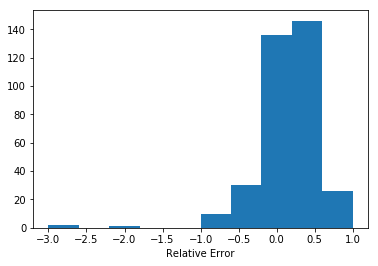

In [15]:
numbins = 22

# plt.hist(rel_err, bins = -0.05*np.ones(numbins) + np.linspace(-1, 1.05, numbins))
plt.hist(rel_err)
plt.xlabel("Relative Error")
plt.plot()

In [16]:
len(np.where(rel_err ==0)[0])

91

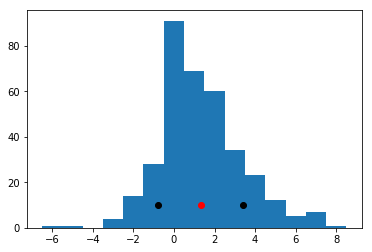

In [17]:
numbins = max(trueCount-predCount) - min(trueCount-predCount) + 1

plt.hist(np.array(trueCount)-np.array(predCount), bins = -0.5*np.ones(numbins) + np.linspace(min(trueCount-predCount), max(trueCount-predCount), numbins))
plt.plot(m, 10, 'ro')
plt.plot(m+s, 10, 'ko')
plt.plot(m-s, 10, 'ko')

plt.show()

In [18]:
print("Mean bias: %.4f" %(m))
print("Error standard deviation: %.4f" %(s))
print("MAE: %.4f" %(mae))
print("RMSE: %.4f" %(rmse))
print("Relative MAE: %.4f" %(rel_mae))
print("Our relative error: %.4f" %(np.mean(np.abs(rel_err))))

Mean bias: 1.3105
Error standard deviation: 2.0872
MAE: 1.7607
RMSE: 2.4646
Relative MAE: 0.3426
Our relative error: 0.3311


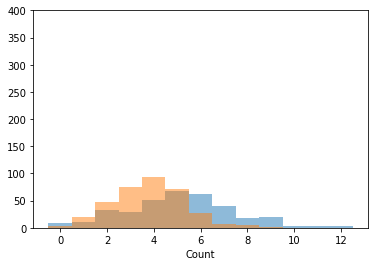

In [19]:
numbins = max(trueCount) - min(trueCount) + 1

plt.hist(np.array(trueCount), bins = -0.5*np.ones(numbins) + np.linspace(min(trueCount), max(trueCount), numbins), alpha = 0.5)
plt.hist(np.array(predCount, dtype='int'), bins = -0.5*np.ones(numbins) + np.linspace(min(trueCount), max(trueCount), numbins), alpha = 0.5)
plt.ylim(0, 400)
plt.xlabel("Count")

plt.show()

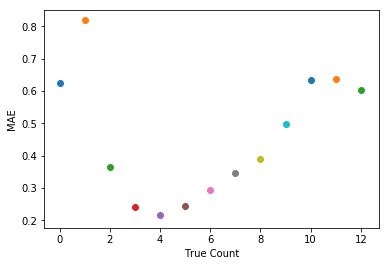

In [20]:
for i in np.arange(max(trueCount)):
    plt.scatter(i, np.mean(np.abs(rel_err[[np.where(trueCount == i)][0]])))
plt.xlabel("True Count")
plt.ylabel("MAE")
plt.show()

In [21]:
for i in np.arange(max(trueCount)):
    print(i, np.mean(np.abs(rel_err[[np.where(trueCount == i)][0]])))

0 0.625
1 0.8181818181818182
2 0.36363636363636365
3 0.24137931034482757
4 0.21634615384615385
5 0.24477611940298505
6 0.2936507936507936
7 0.3464285714285714
8 0.3888888888888889
9 0.49707602339181295
10 0.6333333333333333
11 0.6363636363636364
12 0.6041666666666667
